In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [38]:
# Set plot style
sns.set(context="paper", style='darkgrid', rc={"axes.facecolor": "0.96"})

# Set fontsizes in figures
size = 10
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern"],
    "axes.labelsize": size,
    "font.size": size,
    "legend.fontsize": size,
    "xtick.labelsize": size-1,
    "ytick.labelsize": size-1,
    'legend.handlelength': 2
}

plt.rcParams.update(tex_fonts)
plt.rc('text', usetex=True)

# Set path to save the figures
FIGURE_PATH = "./../latex/figures" 

def fig_path(fig_id):
    """
    Input name of figure to load or save with extension as dtype str
    """
    return os.path.join(FIGURE_PATH + "/", fig_id)

# Set figure size
pt = 410 #360

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

fs = set_size(pt, fraction=1)
print(fs)

(5.673170056731701, 3.5062119190183605)


## Narrow and wide priors

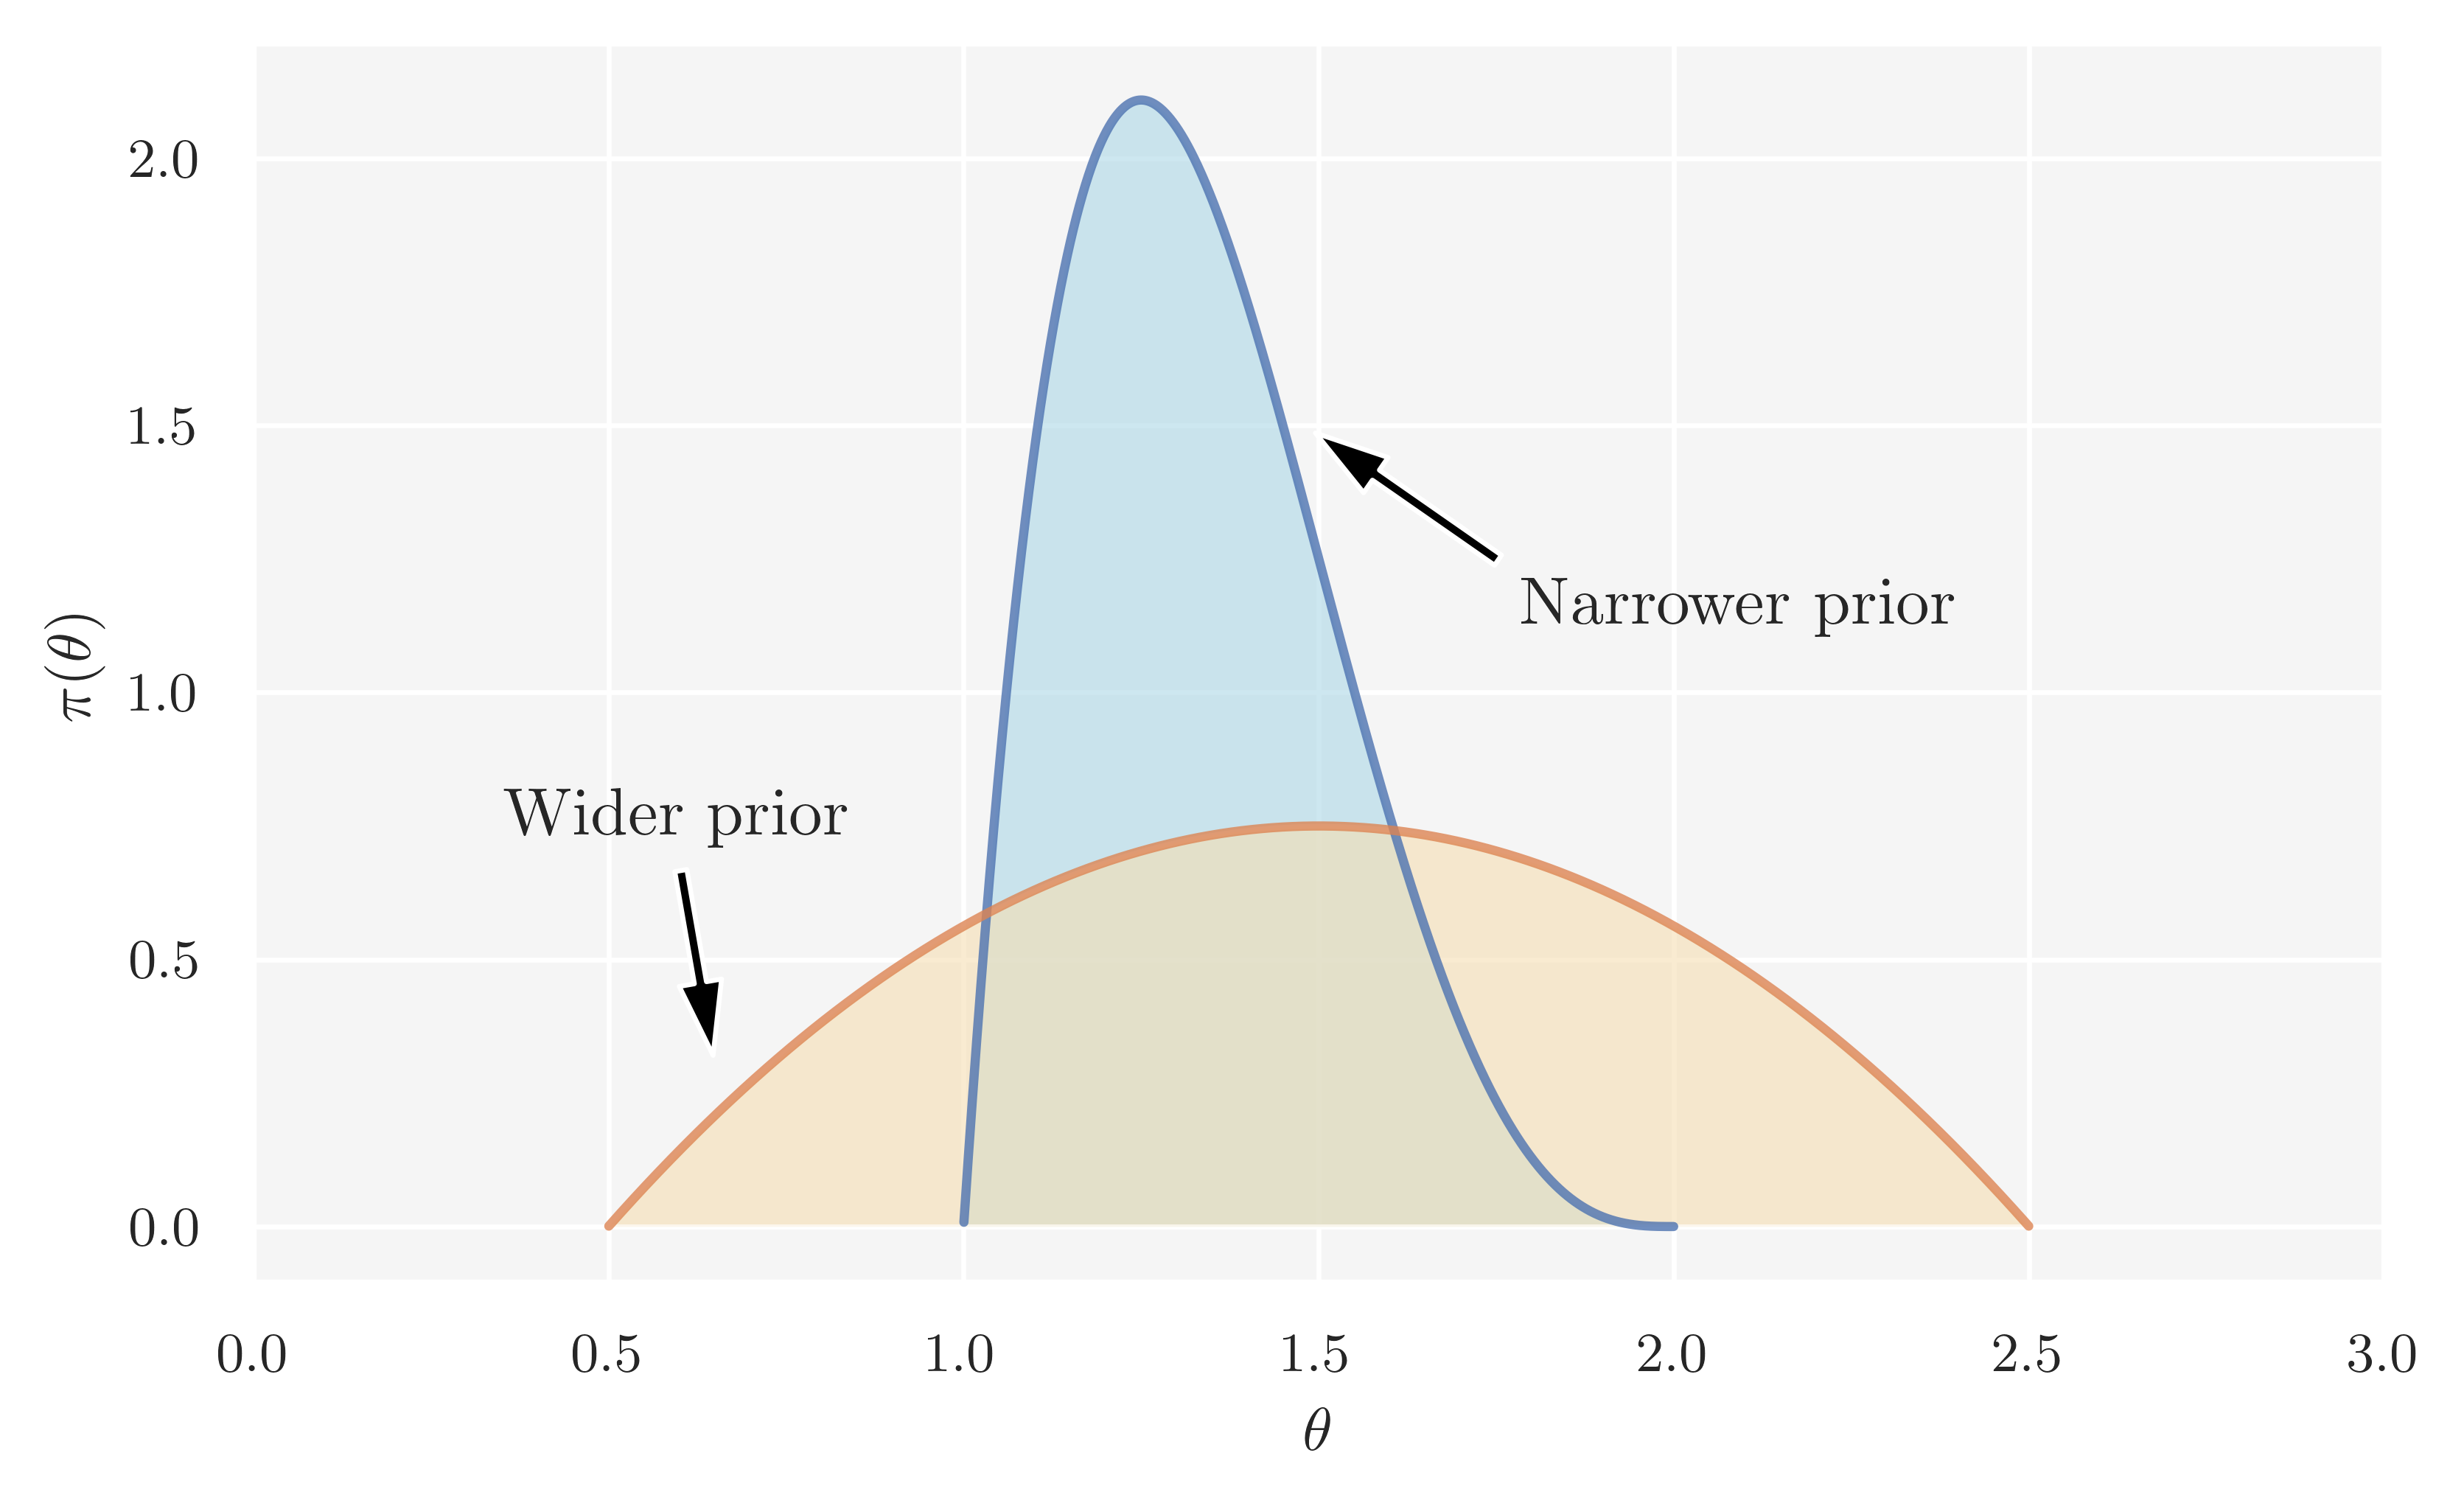

In [39]:
x = np.linspace(0, 3, 5000)
prior_narrow = stats.beta(2, 4, loc=1, scale=1).pdf(x)
prior_wide = stats.beta(2, 2, loc=0.5, scale=2).pdf(x)

prior_narrow[np.where(prior_narrow == 0)] = np.nan
prior_wide[np.where(prior_wide == 0)] = np.nan


#fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True, dpi=800)
fig, ax = plt.subplots(figsize=fs, tight_layout=True, dpi=300)

ax.plot(x, prior_narrow, lw=1.5, ls='-', color='C0', alpha=0.8)
ax.fill_between(x, prior_narrow, alpha=0.6, facecolor='lightblue')
ax.plot(x, prior_wide, lw=1.5, ls='-', color='C1', alpha=0.8)
ax.fill_between(x, prior_wide, alpha=0.6, facecolor='wheat')

ax.annotate('Narrower prior',
            xy=(1.48, 1.5),
            #xy=(1.45, 1.5),
            xycoords='data',
            fontsize=11,
            xytext=(0.8, 0.57),
            #xytext=(0.73, 0.6),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black',
                            shrink=0.05,
                            width=2,
                            headwidth=7),
            horizontalalignment='right',
            verticalalignment='top',
            )

ax.annotate('Wider prior',
            xy=(0.65, 0.3),
            #xy=(0.72, 0.32),
            xycoords='data',
            fontsize=11,
            xytext=(0.28, 0.4),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black',
                            shrink=0.05,
                            width=2,
                            headwidth=7),
            horizontalalignment='right',
            verticalalignment='top',
            )

ax.set(xlabel=r'$\theta$', ylabel=r'$\pi (\theta)$', xlim=(0, 3))

fig.savefig(fig_path('prior_plot.pdf'), format='pdf', dpi=300, bbox_inches='tight')

### Binomial Distribution 

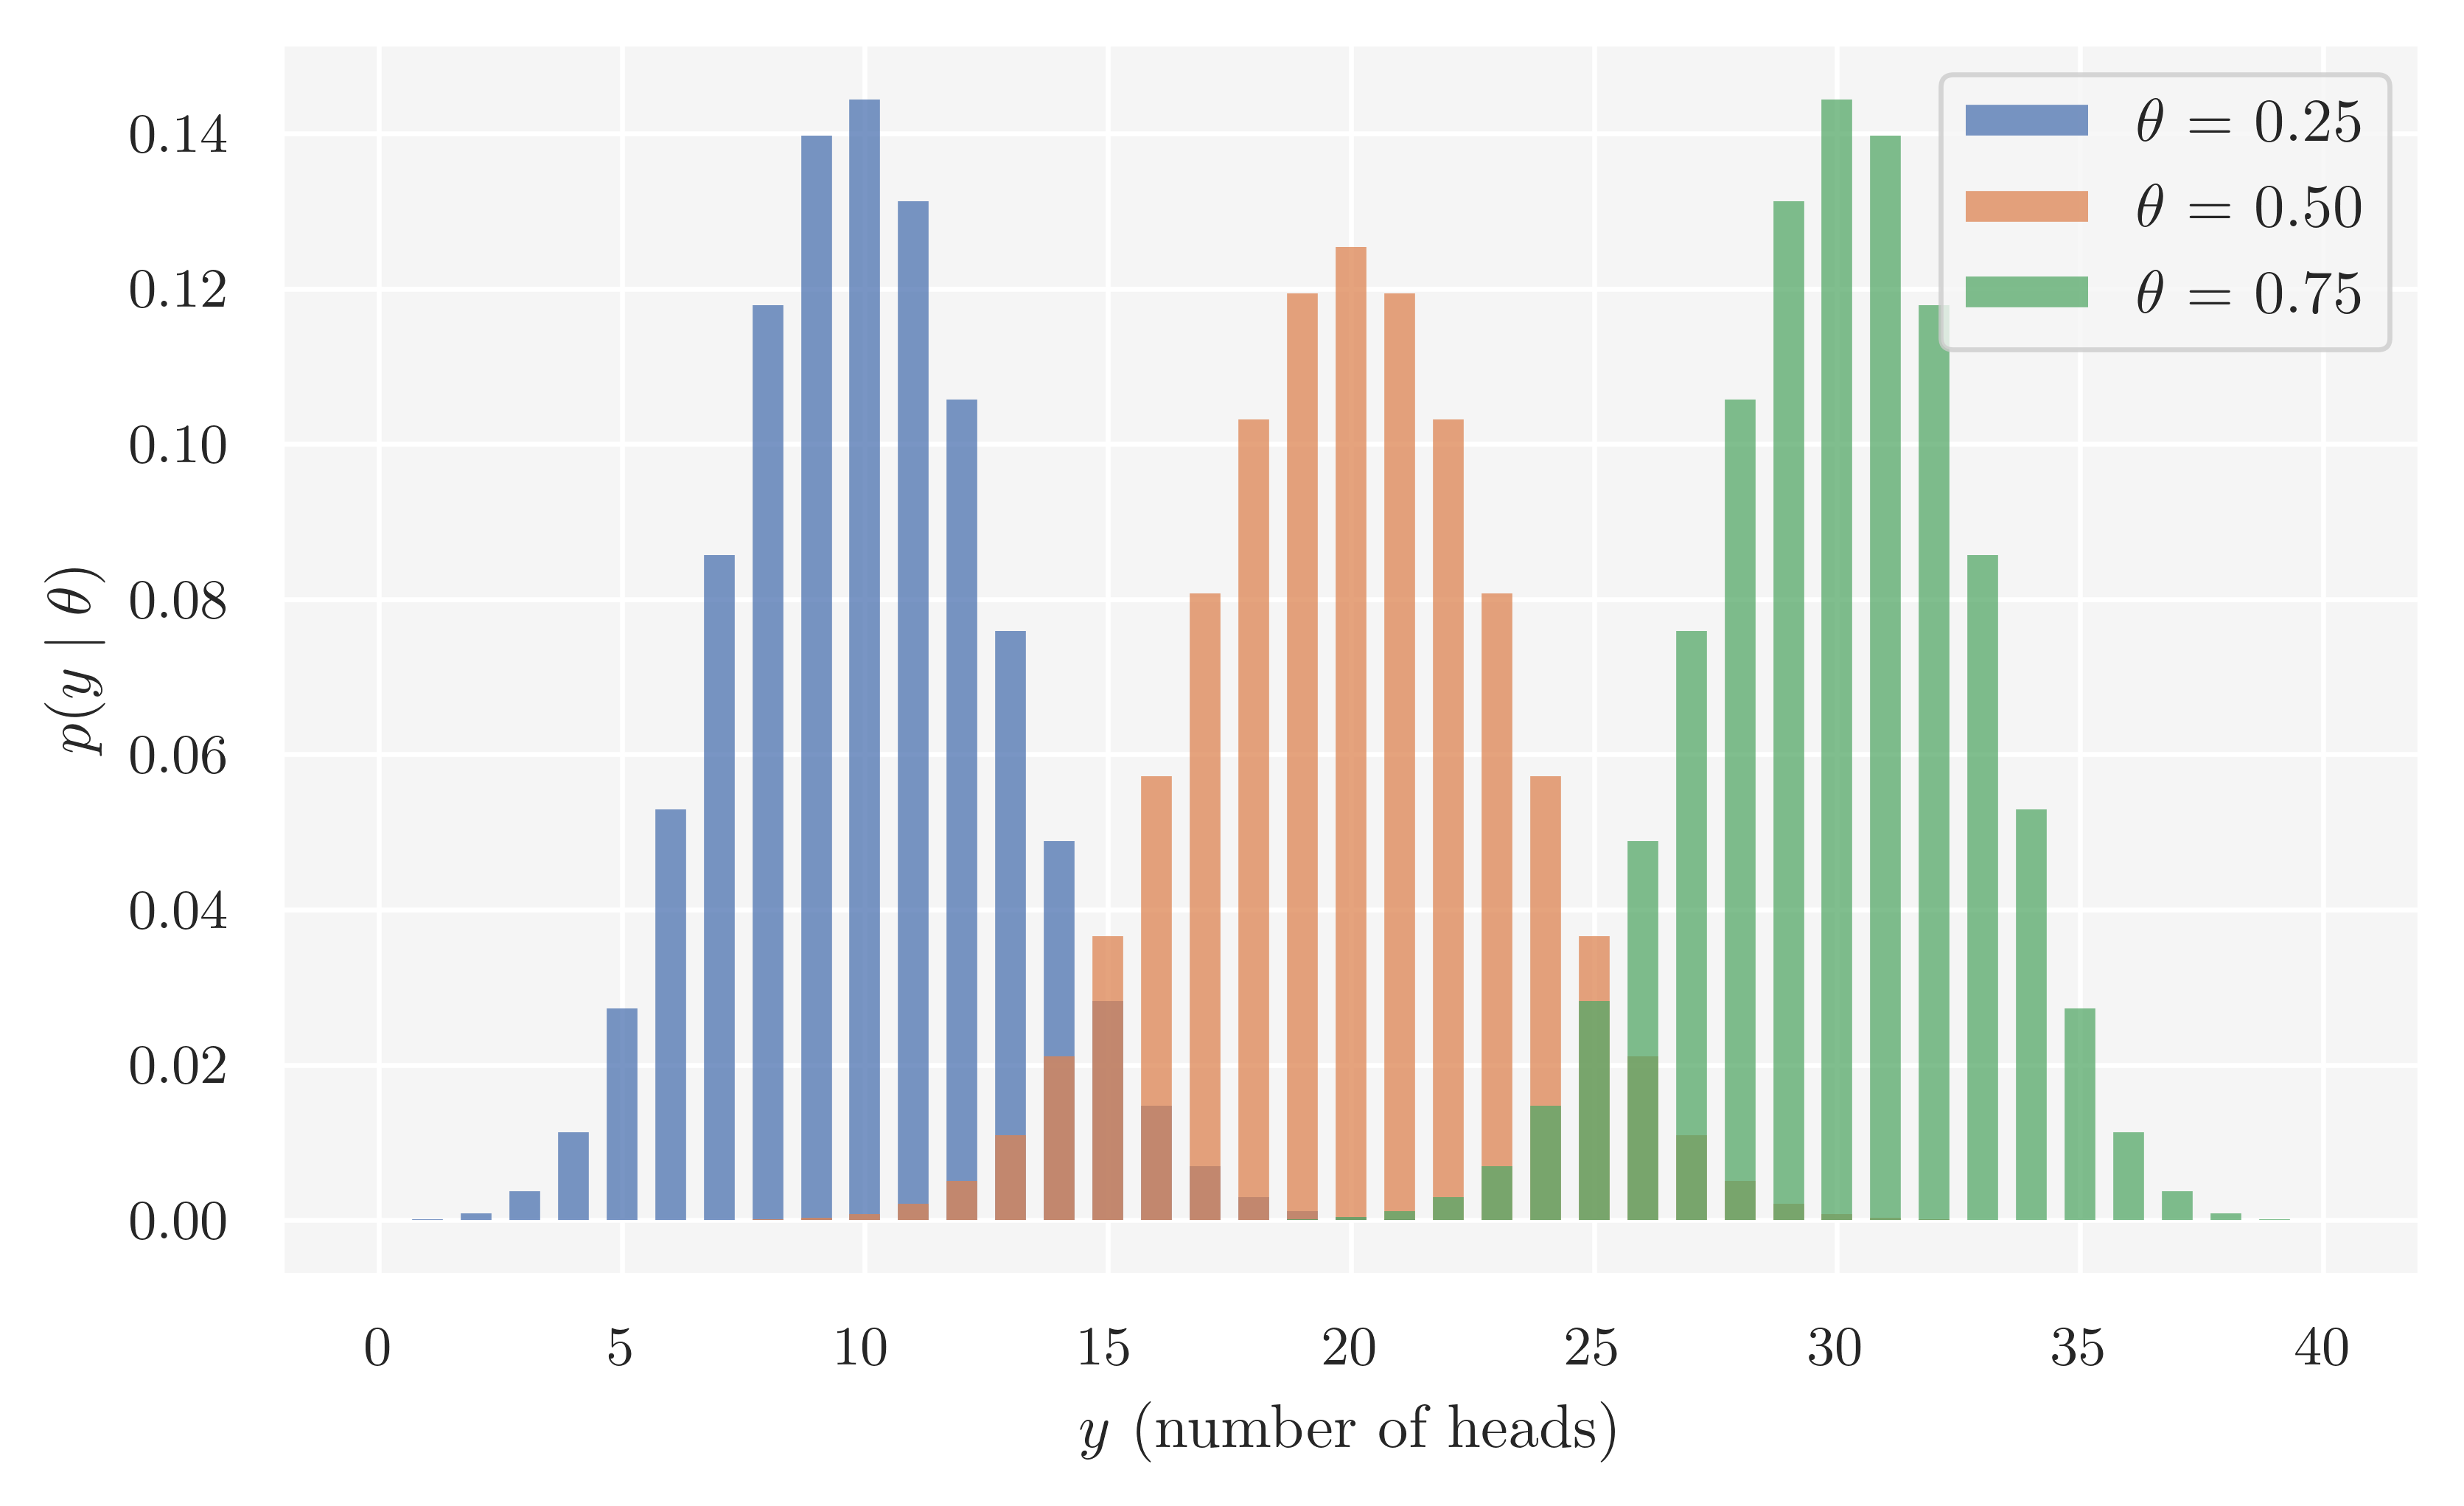

In [47]:
n = 40          # Number of trials
p_params = [0.25, 0.5, 0.75]  # Probability of success
colors = ['C0', 'C1', 'C2']
x = np.arange(0, n + 1)

fig, ax = plt.subplots(figsize=fs, tight_layout=True, dpi=300)

for p, c in zip(p_params, colors):
    y = stats.binom(n=n, p=p).pmf(x)
    ax.vlines(x, 0, y, 
              colors=c, 
              lw=5, 
              alpha=0.75,
              label=f"$\\theta$ = {p:.2f}"
             )
    ax.legend(frameon=True, loc='upper right')

ax.set(xlabel='$y$ (number of heads)',
       ylabel='$p (y \\mid \\theta)$'
      )
#fig.suptitle(f"Probabilities of $n = {n}$ Heads")
#plt.show()
fig.savefig(fig_path('binomial_distribution.pdf'), format='pdf', dpi=300, bbox_inches='tight')

### Beta distribution

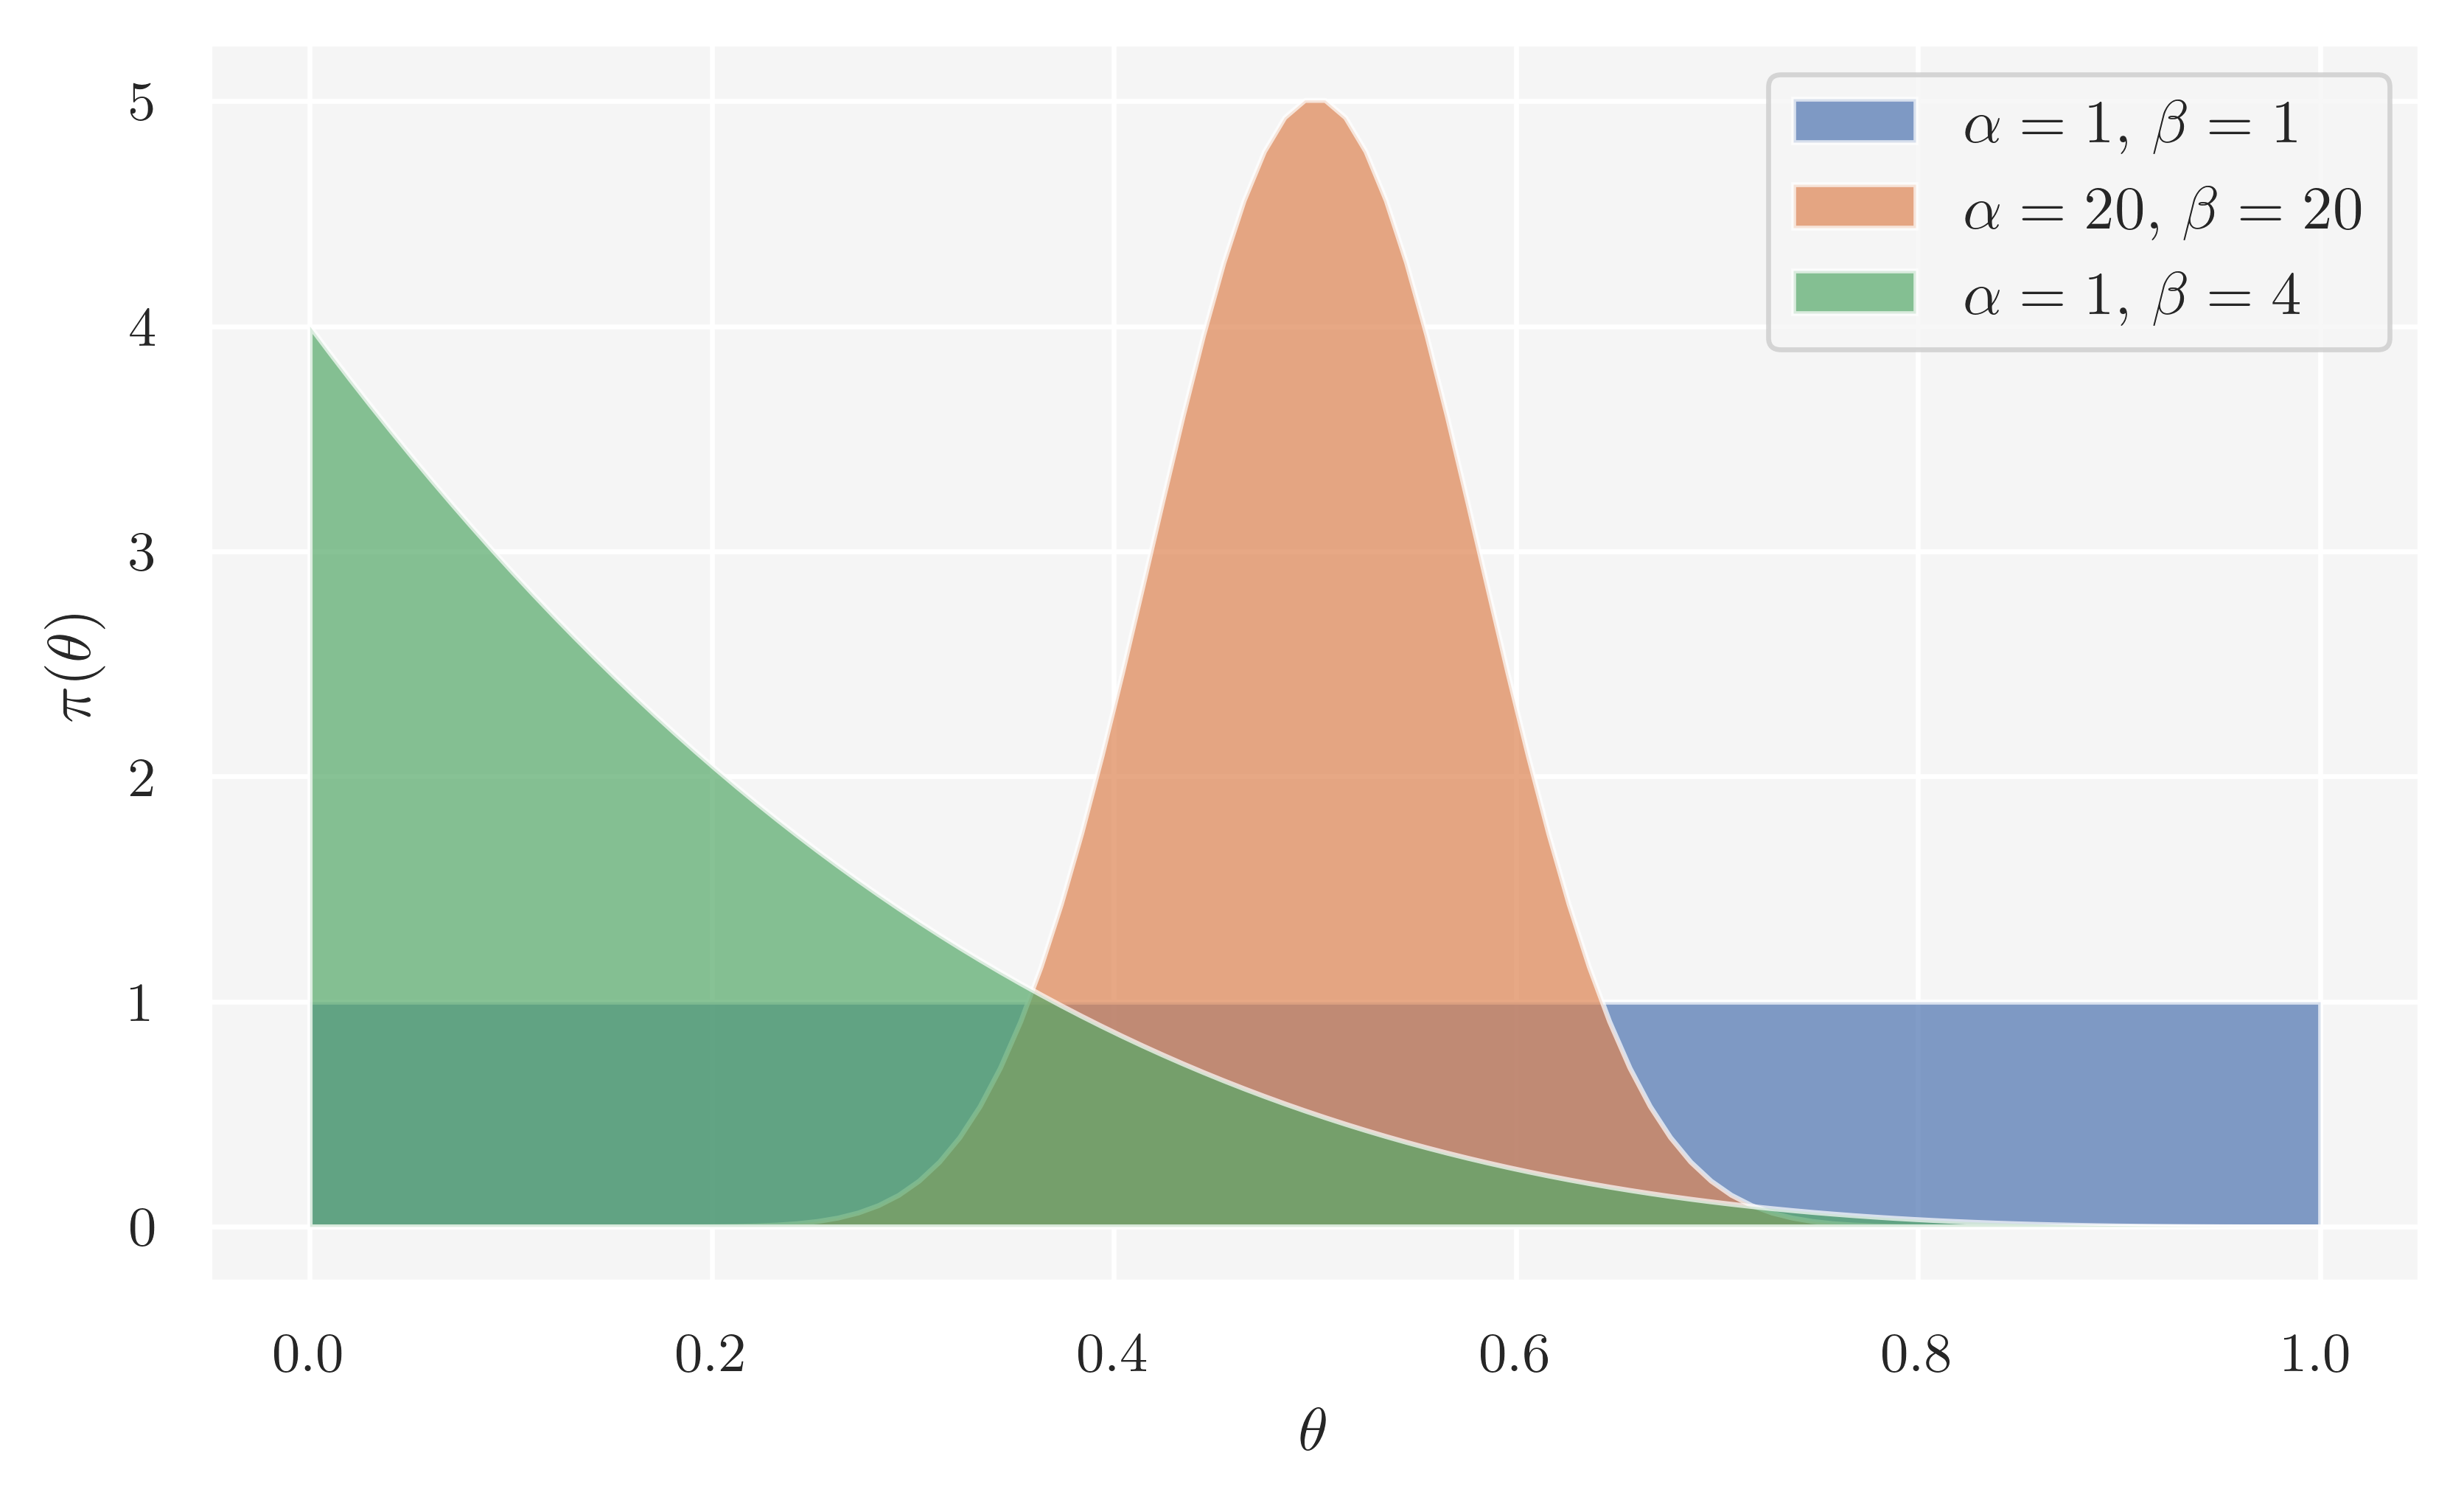

In [98]:
x = np.linspace(0, 1, 100)
beta_params = [(1, 1), (20, 20), (1, 4)]

fig, ax = plt.subplots(figsize=fs, tight_layout=True, dpi=300)

for (a, b) in beta_params:
    y = stats.beta(a, b).pdf(x)
    ax.fill_between(x, 0, y, 
                    alpha=0.7,
                    label=fr"$\alpha = {a}$, $\beta = {b}$"
                   )
    ax.legend()
    
    

ax.set(xlabel=r"$\theta$",
       ylabel=r"$\pi (\theta)$")  

#plt.show()
fig.savefig(fig_path('beta_distribution.pdf'), format='pdf', dpi=300, bbox_inches='tight')

### Coin flip posterior

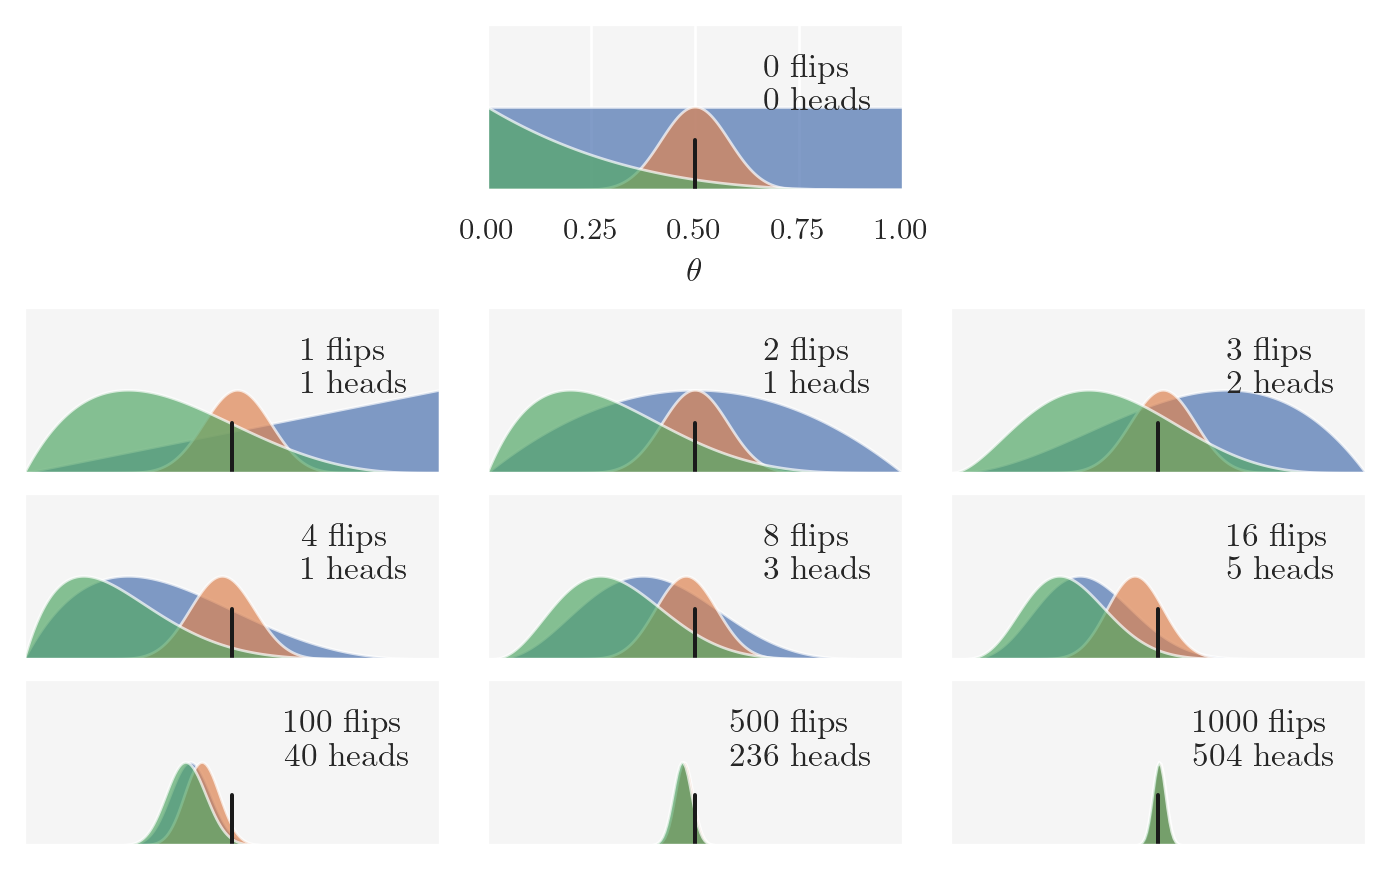

In [105]:
np.random.seed(42)

n_flips = [0, 1, 2, 3, 4, 8, 16, 100, 500, 1000]
theta_real = 0.5
y0 = [stats.binom(n=n, p=theta_real).rvs() for n in n_flips]

beta_params = [(1, 1), (20, 20), (1, 4)]
x = np.linspace(0, 1, 200)

fig = plt.figure(figsize=fs, constrained_layout=True, dpi=120)

for i, n in enumerate(n_flips):
    if i == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel(r'$\theta$')
    else:
        plt.subplot(4, 3, i+3)
        plt.xticks([])
        
    for (a, b) in beta_params:
        posterior = stats.beta.pdf(x, a + y0[i], b + n - y0[i])
        plt.fill_between(x, 0, posterior / np.max(posterior), alpha=0.7)
        
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{n:4d} flips\n{y0[i]:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 2)
    plt.legend(frameon=False)
    plt.yticks([])
    
#plt.show()
fig.savefig(fig_path('coin_flip_posterior.pdf'), format='pdf', dpi=300, bbox_inches='tight')

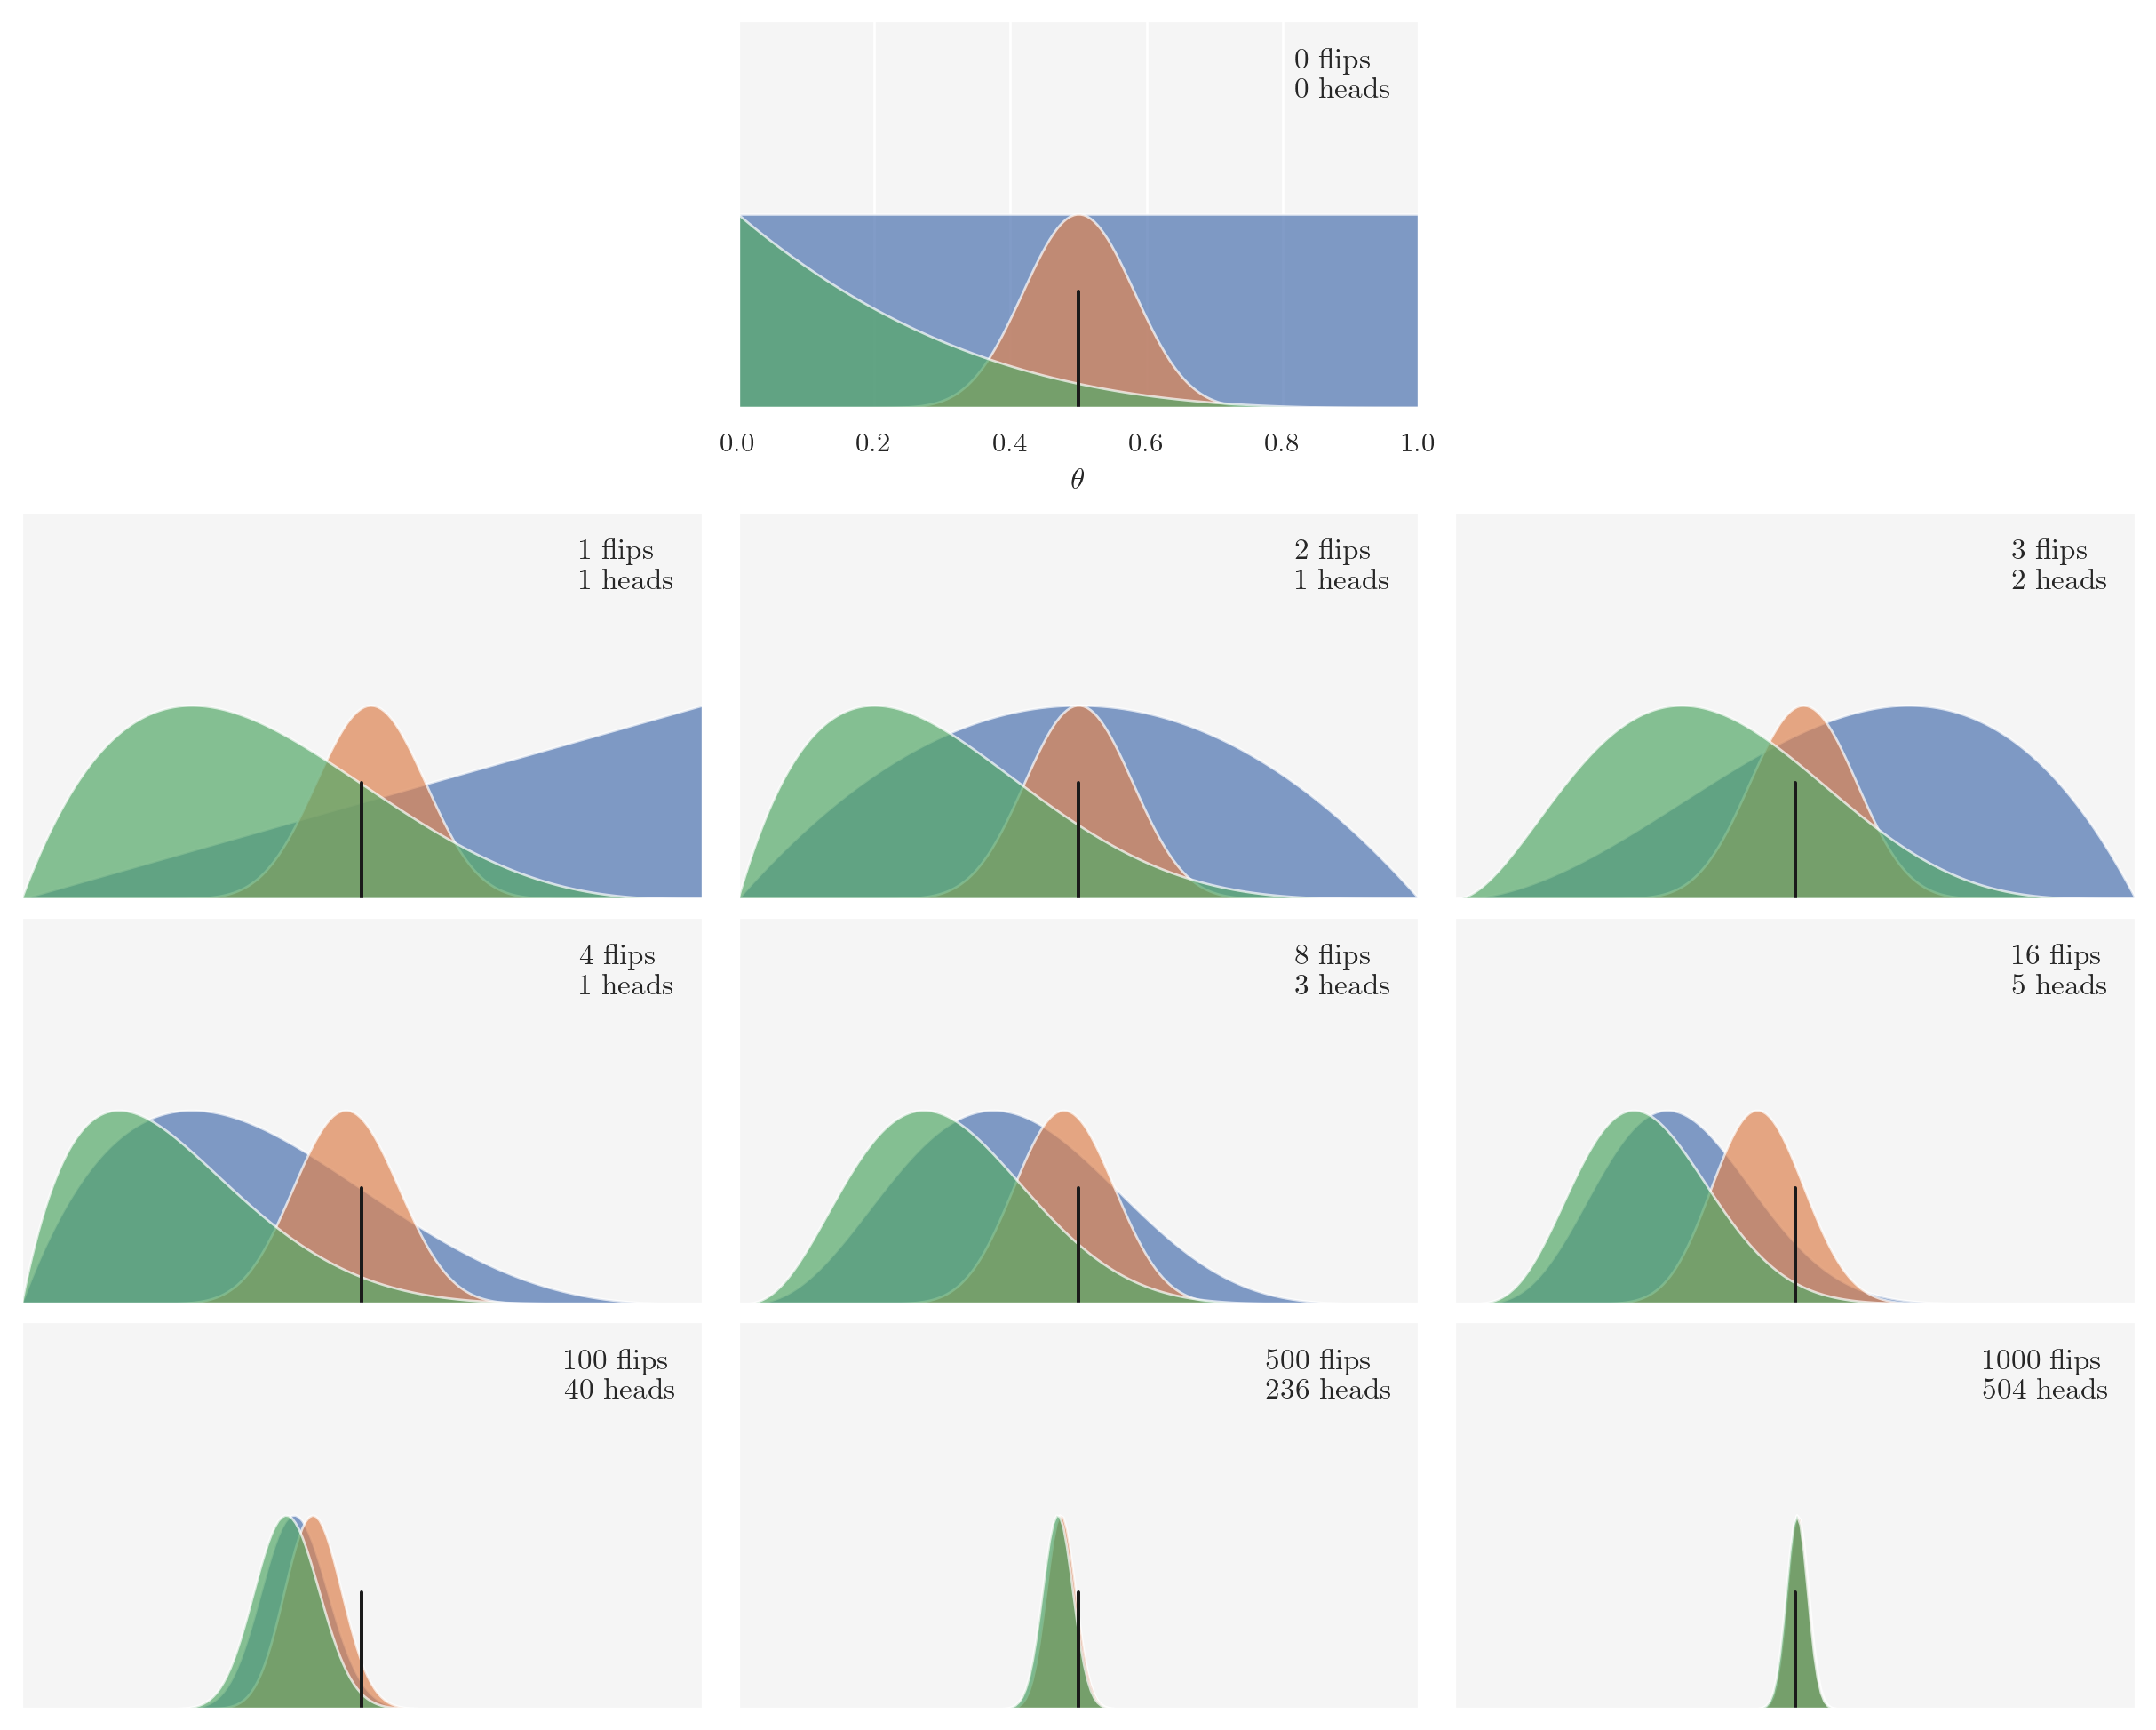

In [107]:
fig = plt.figure(figsize=(10, 8), constrained_layout=True, dpi=120)

np.random.seed(42)

n_trials = [0, 1, 2, 3, 4, 8, 16, 100, 500, 1000]
theta_real = 0.5
data = [stats.binom(n=n, p=theta_real).rvs() for n in n_flips]

beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel(r'$\theta$')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y / np.max(p_theta_given_y), alpha=0.7)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} flips\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 2)
    plt.legend(frameon=False)
    plt.yticks([])

#plt.show()
fig.savefig(fig_path('coin_flip_posterior2.pdf'), format='pdf', dpi=300, bbox_inches='tight')